In [9]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [10]:
with open("simulation_dataforloop_df.pkl", "rb") as f:
    data_forloop = pickle.load(f)

with open("sim_data_with_df.pkl", "rb") as f:
    data_functions = pickle.load(f)

In [11]:
t_eval = data_forloop["t"]
max_time = 20  # in Myr

t_eval.shape

(500,)

In [12]:
output_folder = "saved comparisons"
os.makedirs(output_folder, exist_ok=True)

In [13]:
params = [k for k in data_forloop.keys() if k != "t"]


def plot_vector_param(ax, t, forloop_val, functions_val, ylabel):
    if forloop_val.ndim == 2 and forloop_val.shape[1] == 3:
        components = ['x', 'y', 'z']
        for i, comp in enumerate(components):
            ax.plot(t, forloop_val[:, i], label=f"For Loop {comp}")
            ax.plot(t, functions_val[:, i], label=f"Functions {comp}", linestyle='--')
    else:
        ax.plot(t, forloop_val, label="For Loop")
        ax.plot(t, functions_val, label="Functions", linestyle='--')
    ax.set_ylabel(ylabel)
    ax.legend(loc="upper right", fontsize=8)
    ax.grid(True)


len(params)

11

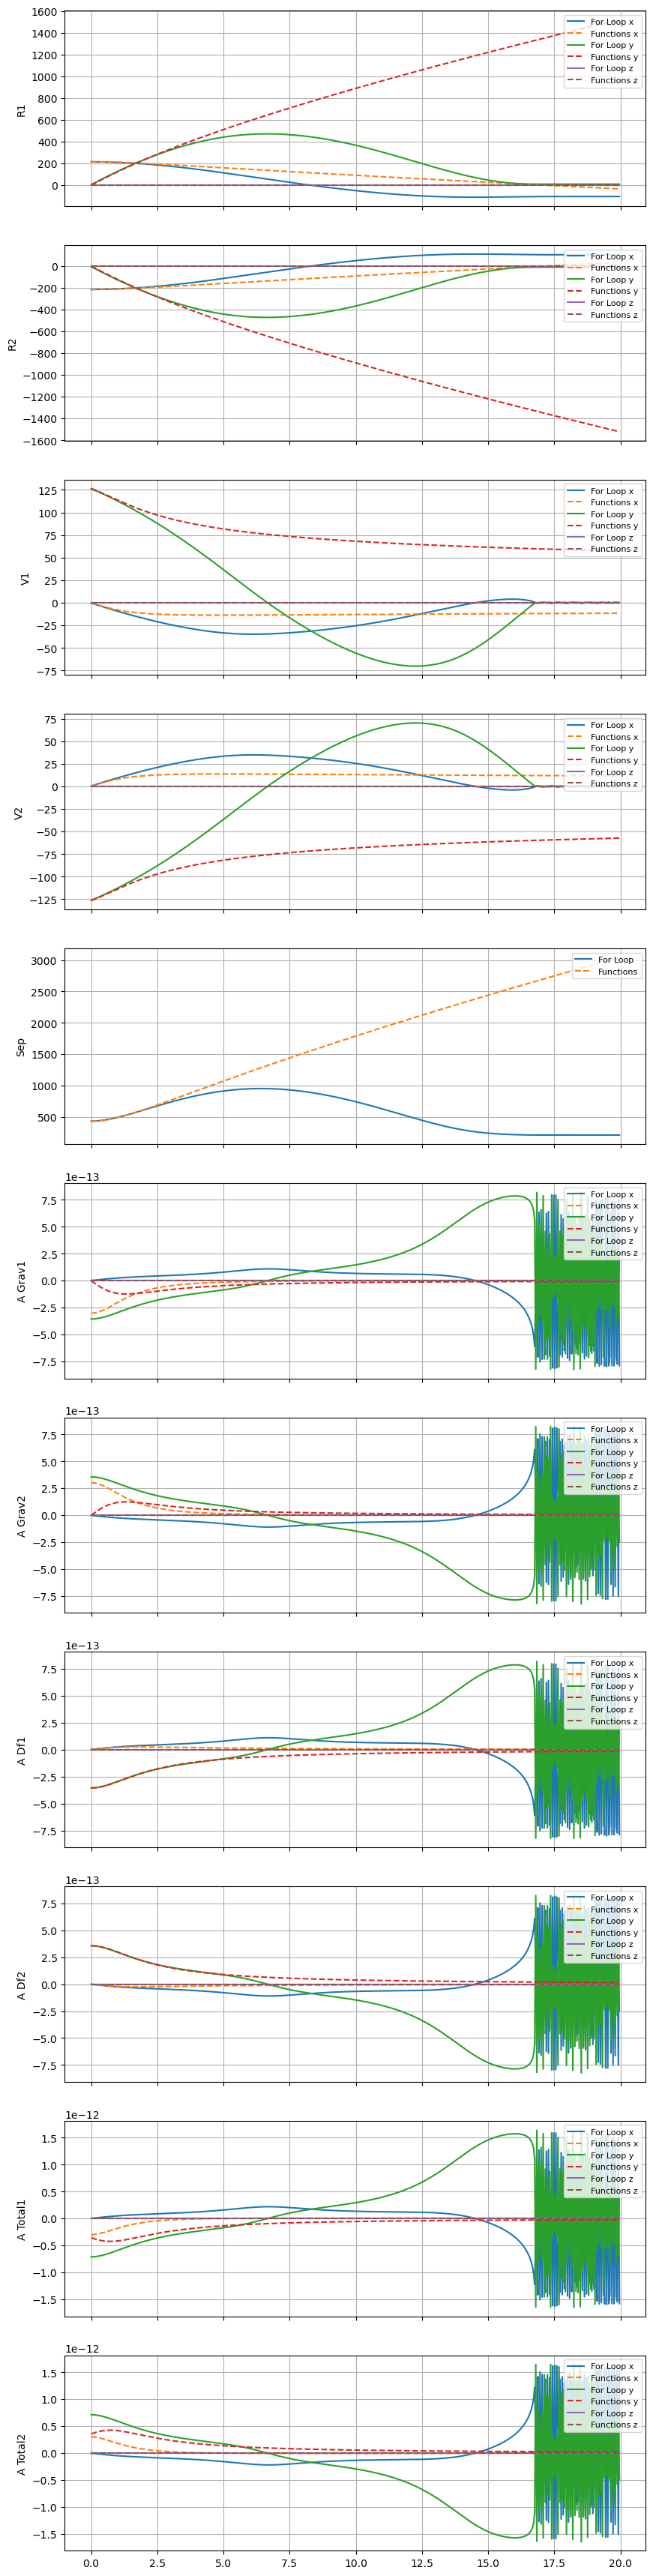

In [14]:
fig, axs = plt.subplots(len(params), 1, figsize=(10, 4 * len(params)), sharex=True)
if len(params) == 1:
    axs = [axs] 

t_plot = data_forloop["t"]
len(params)


t_plot.shape

for ax, param in zip(axs, params):
    ylabel = param.replace("_", " ").title()
    plot_vector_param(
        ax,
        t_plot,
        data_forloop[param],
        data_functions[param],
        ylabel
    )

Plot saved to saved comparisons/comparison_forloop_vs_functions_withdf_allparams.png


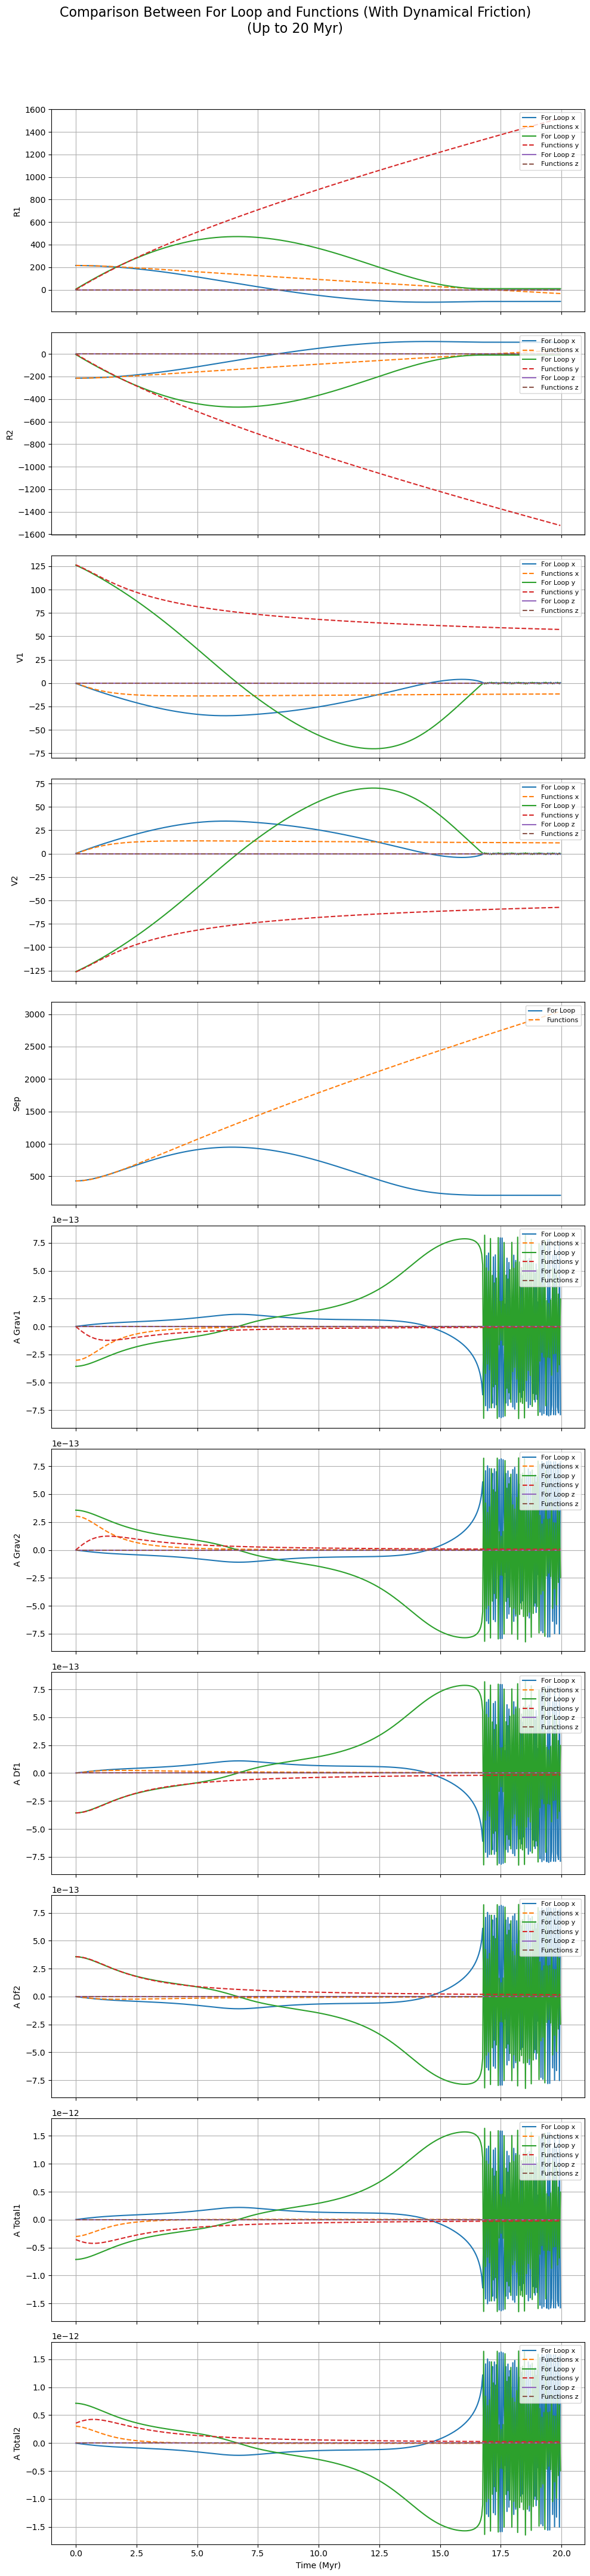

In [15]:
fig, axs = plt.subplots(len(params), 1, figsize=(10, 4 * len(params)), sharex=True)
if len(params) == 1:
    axs = [axs]  # make iterable if only one param

t_plot = data_forloop["t"]

for ax, param in zip(axs, params):
    ylabel = param.replace("_", " ").title()
    plot_vector_param(
        ax,
        t_plot,
        data_forloop[param],
        data_functions[param],
        ylabel
    )

axs[-1].set_xlabel("Time (Myr)")
fig.suptitle("Comparison Between For Loop and Functions (With Dynamical Friction)\n(Up to 20 Myr)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save
save_path = os.path.join(output_folder, "comparison_forloop_vs_functions_withdf_allparams.png")
plt.savefig(save_path)
print(f"Plot saved to {save_path}")

plt.show()